# Semantic segmentation

In this notebook we will show how to visualize and use our pixel-perfect segmentation modality. To read more about this modality check out our documentation - https://docs.datagen.tech/en/latest/Modalities/semantic_segmentation.html

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2

import sys

import datagen
from dghelpers import imshow

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../resources/faces_1'
ds = datagen.load(DATASET_PATH)
dp= ds[5]

## Segmentation visualization

Text(0.5, 1.0, 'Segmentation map')

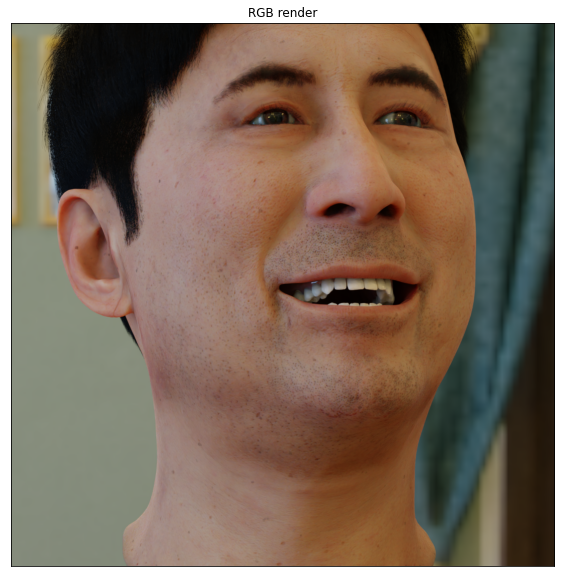

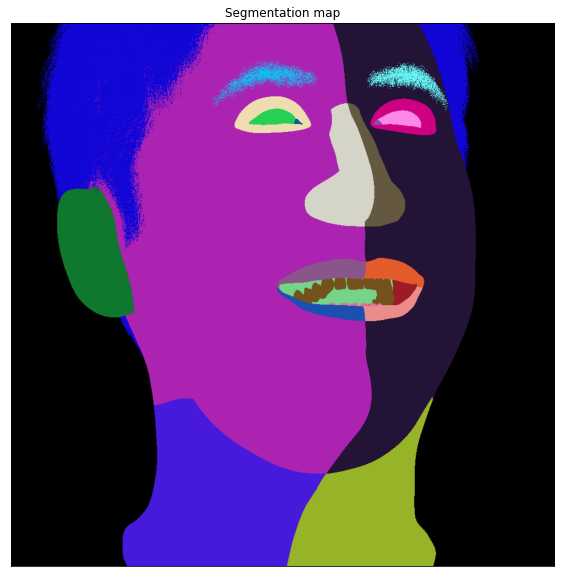

In [3]:
imshow(dp.visible_spectrum)
plt.title('RGB render')

#The segmentation map is 16 bit. It has to be normalized to be displayed
imshow((dp.semantic_segmentation/256).astype(np.uint8))
plt.title('Segmentation map')

## Background replacement
We'll remove the original background from the image using the segmentation map and replace it with a new random background

Let's load the new background and crop it to the render size

In [4]:
random_background = plt.imread('../docs/assets/random_background.jpg')
random_background = PIL.Image.fromarray(random_background).crop(box=(0, 0, dp.visible_spectrum.shape[0], dp.visible_spectrum.shape[1]))
random_background = np.asarray(random_background)

Create a background mask using the segementation colormap

Text(0.5, 1.0, 'Background mask')

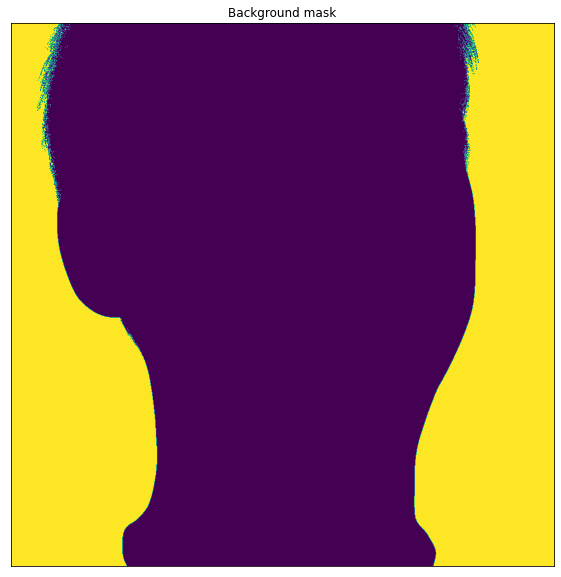

In [5]:
background_mask = np.logical_and.reduce(dp.semantic_segmentation == dp.semantic_segmentation_metadata.background, axis=2)
imshow(background_mask.astype('float'))
plt.title('Background mask')

Now replace the background pixels from the render with the new background's pixels

Text(0.5, 1.0, 'Rgb render with the new background')

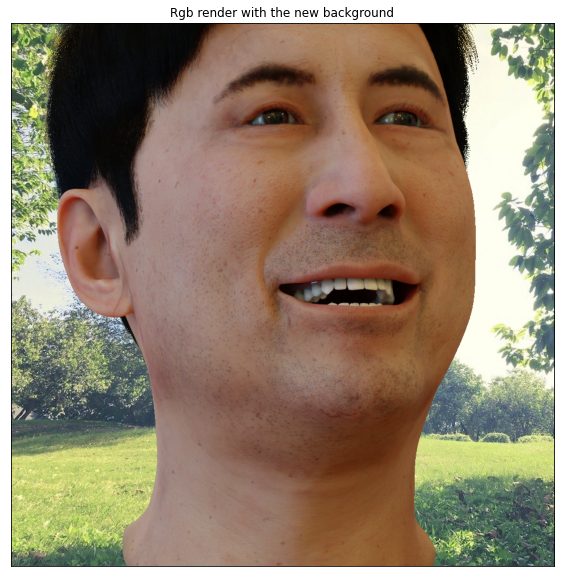

In [6]:
rgb_new_background = dp.visible_spectrum.copy()
rgb_new_background[background_mask] = np.asarray(random_background)[background_mask]

imshow(rgb_new_background)
plt.title('Rgb render with the new background')

## Segment extraction
This part explains how to extract different segments from the segmentation map


A segment's color map can be accessed using:

In [7]:
print(f'Left eyebrow segment RGB code = {dp.semantic_segmentation_metadata.human.head.eyebrow.left}')

Left eyebrow segment RGB code = [25890 62289 62077]


Let's extract the nose from the picture using the segmentation map. <br>
To perform this task, we have to unify the nose's left and right segments into a single mask...

In [8]:
nose_colormap = dp.semantic_segmentation_metadata.human.head.nose
seg_mask = np.logical_or(dp.semantic_segmentation == nose_colormap.left, dp.semantic_segmentation == nose_colormap.right).all(axis=-1)
seg_mask = np.broadcast_to(seg_mask[..., np.newaxis], dp.visible_spectrum.shape)
print(nose_colormap.left)
print(nose_colormap.right)

[25984 22567 16578]
[54652 54478 51619]


... and apply the mask to the render

Text(0.5, 1.0, 'Nose segmentation')

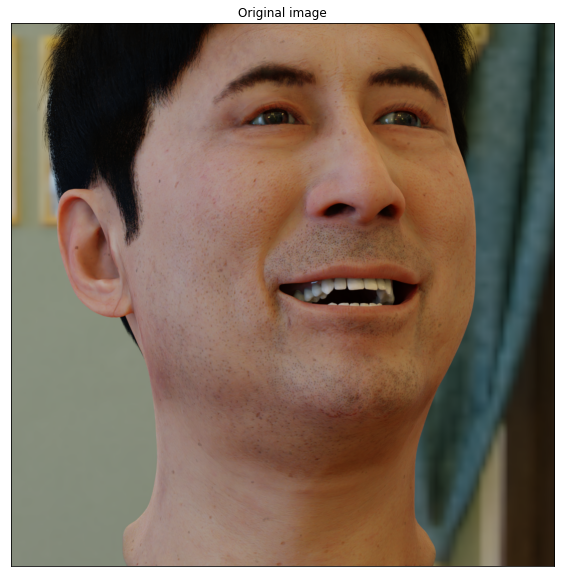

<Figure size 432x288 with 0 Axes>

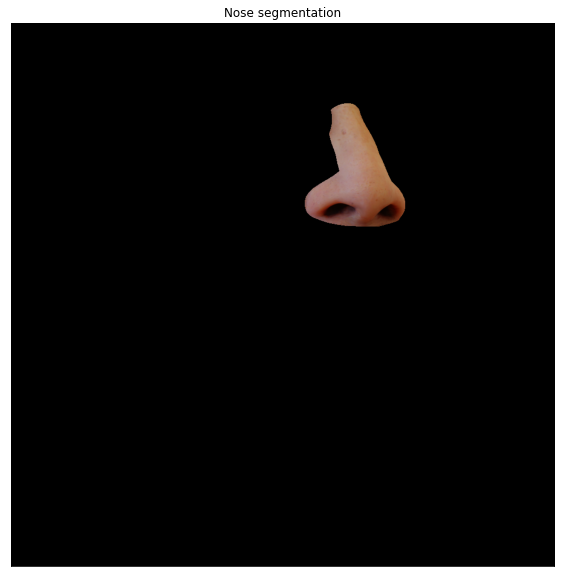

In [9]:
segment_img = dp.visible_spectrum.copy()
segment_img[~seg_mask] = 0

imshow(dp.visible_spectrum)
plt.title('Original image')
plt.figure()
imshow(segment_img)
plt.title('Nose segmentation')